# 问题

1. 逻辑回归的问题
    - $y = S( xW)$ ，其中y是概率；
        - 逻辑回归，分类的效果，实际还是线性。（绘制图形，分类边界线：直线）：属于线性回归；
        - 输出概率：正分类概率（属于A概率），负分类概率（属于B概率）
            - y只输出一个概率。就算正分类概率：99.99% 负分类概率（99.999%）
                - p(A) + p(B) =1 p(A)>=0.5 可以做结论。
            - 标签进行改造：
                - A = 0    :     `[1,  0]`
                - B = 1    :     `[0,  1]`
                
            - 训练：
                - $p =  [p_a, p_b]$    
                    - $p_a \gt   p_b ,\qquad   x \in A \text{类}$

2. 一个不能线性可分的例子

100


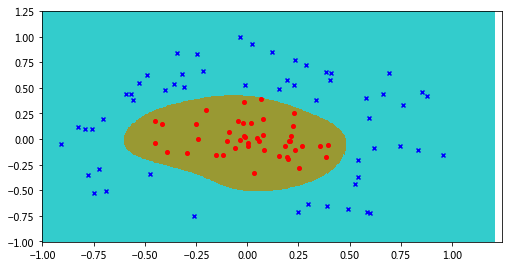

array([-1., -1., -1., ..., -1., -1., -1.])

In [62]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn  as sk
import pandas as pd
from sklearn.svm  import SVC
from  matplotlib.colors import ListedColormap    
from sklearn.linear_model import LogisticRegression

# 样本集的该要信息（可视化）

# 1. 读取数据样本
data = pd.read_csv('train_data.csv')
# 对数据分成-1，1两类
# data['label'] == 1.0
data_1 = data[data['label'].isin([1.0])]
data_2 = data[data['label'].isin([-1.0])]

# -----------------
# 训练特征（2个特征：列）样本
X = data[['feature1', 'feature2']]
# 训练标签
Y =data['label']
# 使用sklearn创建SVM分类器SVC
classfier = SVC(C=1, gamma=10)
# classfier = LogisticRegression()
# 开始训练
classfier.fit(X,Y)    # 训练过程中得到一些参数。

# 预测(使用训练集作为预测样本)
predict = classfier.predict(X)   # 得到的结果就是分类结果

print((predict == data['label']).sum())

# -----------------



# 2. 可视化
figure = plt.figure('SVM', figsize=(8,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
# ===================
# 使用颜色把分类的区域标识出来（达到3维信息的可视化效果）
# 把数据所在范围：分成若干行与列，每个行列的交叉点当成样本数据，
# 这个样本数据在上面的训练结果下有一个预测值，这个预测值使用不同颜色绘制出来，就形成区域
# 1. 对数据x，y方向取最大值与最小值
# 取两个特征的数据值
x1 = X['feature1']
x2 = X['feature2']
# 最两个坐标轴定位最大最小值
x1_min, x1_max = x1.min(), x1.max()    # x轴
x2_min, x2_max = x2.min(), x2.max()  # y轴

# 放大
x1_min -= 0.25
x1_max += 0.25

x2_min -= 0.25
x2_max += 0.25

ax.set_xlim(x1_min, x1_max)
ax.set_xlim(x2_min, x2_max)

# 2. 把最小与最大之间划分成n个等差数列值。
x1_grid,  x2_grid = np.mgrid[x1_min: x1_max: 400j, x2_min: x2_max: 400j]   # 根据类似切片的数据描述分成n等分
# 3. 形成n*n的坐标（表示一样笨）列表
# 把数据变成一维
x1_flat = x1_grid.flat    # 2维变1为
x2_flat = x2_grid.flat

# 形成网格坐标
grid_plane =np.stack((x1_flat, x2_flat), axis=1)  # 对应映射，形成坐标（是一个矩阵）
# 4. 列表中的每个坐标在训练模型下，就有一个输出值（分类）
grid_predict = classfier.predict(grid_plane)

# 5. 根据输出值，直接绘制颜色（,atplotlib中Axes提供一个函数绘制这种图形）pcolormesh 像素颜色网格图ax.pcolormesh
#  grid_predict的数据是1维，变成对应的坐标格式：与x1_grid，x2_grid形状。

ax.pcolormesh(x1_grid, x2_grid, grid_predict.reshape(x1_grid.shape),  cmap=ListedColormap([ (0.2, 0.8, 0.8, 1),(0.6, 0.6, 0.2, 1)]))
# ===================
ax.scatter(data_1['feature1'], data_1['feature2'], c='r', s=16, marker='o')
ax.scatter(data_2['feature1'], data_2['feature2'], c='b', s=16, marker='x')

plt.show()
grid_predict

- 注释：
    - 实现逻辑回归，这两类样本不可分的。
    
    - 算法的掌握程度：
        - 利用sklearn，tensorflow调用算法函数；
        - 调整参数
            - 用参：理解参数的含义：控制参数达到我的目标；
            - 调参：训练参数：机器训练得到最佳参数
           
        - 在别人的算法基础上，设计算法
            - 设计算法（根据业务数据，选择算法改进）
            - 实现算法
            
        - 创新算法

3. 使用SVM的不可分的效果